<a href="https://colab.research.google.com/github/mechhector/visao_computacional20212/blob/main/trabalho1/q6_sobel_DIP_20212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Dimensões da Imagem: (133, 277)


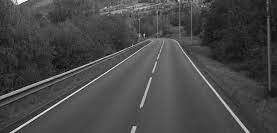

In [ ]:
# PDI 2021.2 Trabalho 1 
# Hector Leonardo Mota Moreira


# Sobel Operator


import numpy as np
import cv2
import math as m
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow


# ========= Loading the image =========

#img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/lena.png', 0)

#img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/joaninha.jpg', 0)

#img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/messi.jpg', 0)

#img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/chaplin.png', 0)

img = cv2.imread('/content/drive/MyDrive/Computer_Vision/img_src/road_peuqeno.jpeg', 0)

#img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/exemplo.png', 0)

#img = cv2.imread('/content/drive/MyDrive/Computer_Vision/Trabalho_1 /img_scr/girassol.jpg', 0)

# ============== Kernel =============== 

k = 3

c = int (k/2) # Just do simplify; k is the kernel dimension (k x k)

horizontal_sobel_kernel = np.array(([-1,0,1],[-2,0,2],[-1,0,1]))

vertical_sobel_kernel = np.array(([-1,-2,-1],[0,0,0],[1,2,1]))

# ======= Number of Iterations ======== 

n = 1

# =========== Image Content =========== 

image_content = 'messi'


print(horizontal_sobel_kernel)

print(vertical_sobel_kernel)

print ('Dimensões da Imagem:', img.shape)

cv2_imshow(img)

(133, 277)
(135, 279)


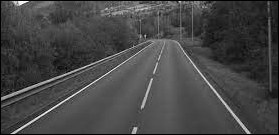

In [ ]:
# ============== Padding ==============

line, column = (img.shape) 

holdpdd = np.zeros( ((line + 2 * c), (column + 2 * c)) )  

new_line, new_column = (holdpdd.shape)

holdpdd [ c : new_line - c , c : new_column - c ] = img # Based on the Professor Navar's lecture.

print(img.shape)
print (holdpdd.shape)
cv2_imshow(holdpdd)

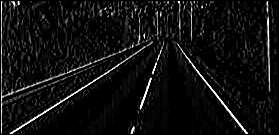

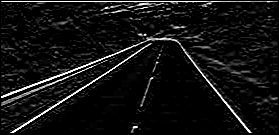

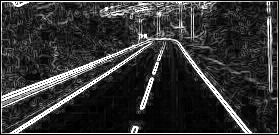

[[255. 255. 255. ... 139. 145. 156.]
 [255.  87.  76. ...  15.  13. 145.]
 [255.  37.  22. ...  14.  10. 148.]
 ...
 [213.  84.  52. ...  21.  18. 221.]
 [187.  40.   2. ...  12.  13. 230.]
 [185. 177. 172. ... 233. 232. 247.]]


True

In [ ]:
# ============ Convolution ============ 


holdpdd_copy_horizontal = holdpdd.copy()  # Based on the Professor Navar's code.

holdpdd_copy_vertical = holdpdd.copy()    # Based on the Professor Navar's code.


# Horizontal Mask

for x in range (c,holdpdd_copy_horizontal.shape[0]-c):
  for y in range(c,holdpdd_copy_horizontal.shape[1]-c):
      
    lol = holdpdd[ x - c:x + c + 1 , y - c: y + c + 1 ]
          
    horizontal_mask = (lol*horizontal_sobel_kernel).sum()
    
    holdpdd_copy_horizontal[x,y] = round(horizontal_mask)
 
# Vertical Mask

for x in range (c,holdpdd_copy_horizontal.shape[0]-c):
  for y in range(c,holdpdd_copy_horizontal.shape[1]-c):
      
    lol = holdpdd[ x - c : x + c + 1 , y - c: y + c + 1 ]
          
    vertical_mask = (lol*vertical_sobel_kernel).sum()
    
    holdpdd_copy_vertical[x,y] = round(vertical_mask)


cv2_imshow(holdpdd_copy_horizontal) # S_h display

cv2_imshow(holdpdd_copy_vertical)   # S_v display


# Sobel image and intensity adjustment 

sobel_image = np.sqrt((holdpdd_copy_horizontal**2 + holdpdd_copy_vertical**2)) # sobel image calc

cv2_imshow(sobel_image) # sobel image display 

sobel_adjusted = sobel_image.copy()


for i in range (0, sobel_adjusted.shape[0]):
  for j in range (0, sobel_adjusted.shape[1]):

    if sobel_adjusted[(i,j)] > 255:

      sobel_adjusted[(i,j)] = 255

    else:
      sobel_adjusted[(i,j)] = round(sobel_adjusted[(i,j)])

 

final_image = np.zeros((line,column))

final_image = sobel_adjusted [ c : new_line - c , c : new_column - c ] # padding remove

print(final_image)

file_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q6_Sobel_Filter/{}_sobel_filter.png'

sh_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q6_Sobel_Filter/{}_sh_sobel_filter.png'

sv_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q6_Sobel_Filter/{}_sv_sobel_filter.png'


#cv2.imwrite(sh_name.format(image_content),holdpdd_copy_horizontal) 

#cv2.imwrite(sv_name.format(image_content),holdpdd_copy_vertical) 

cv2.imwrite(file_name.format(image_content),final_image) # image saving

In [ ]:
print(img.shape, final_image.shape)

(133, 277) (133, 277)
